In [12]:
import sys
sys.path.append('../')
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from nst.models_architectures.transformation_network import ImageTransformationNetwork

In [7]:
# Load model
model = ImageTransformationNetwork()
model.load_state_dict(torch.load('../models/starry_night_1e6_batch_7419.pt'))

<All keys matched successfully>

In [16]:
def show_img(image_path):
    # Convert to tensor
    img = torch.from_numpy(np.copy(np.asarray(Image.open(image_path).resize((256, 256))).transpose(2, 0, 1).reshape(1, 3, 256, 256))).float()
    
    # Put through network
    gen_img = model(img)
    gen_img = gen_img.detach().numpy()
    
    # Clip the floats
    gen_img = np.clip(gen_img, 0, 255)
    
    # Convert to ints (for images)
    gen_img = gen_img.astype('uint8')
    gen_img = gen_img.reshape(3, 256, 256).transpose(1, 2, 0)
    
    # Show the image
    plt.imshow(gen_img)
    plt.show()

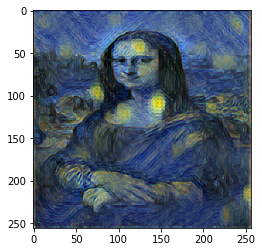

In [17]:
show_img('../example_data/mona-lisa.jpg')